1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

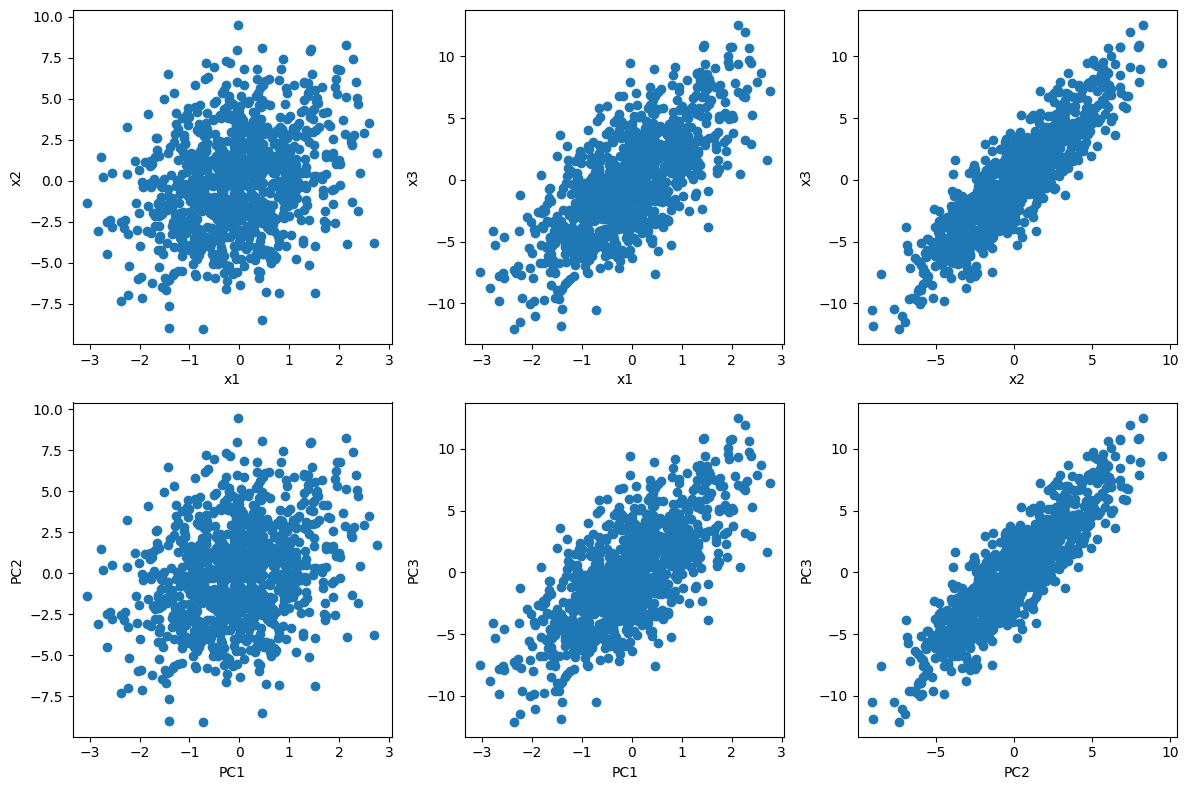

In [26]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def generate_dataset(N):
    np.random.seed(0)
    x1 = np.random.normal(0, 1, N)
    x2 = x1 + np.random.normal(0, 3, N)
    x3 = 2 * x1 + x2
    data = np.column_stack((x1, x2, x3))
    return data

def perform_eigendecomposition(data):
    cov_matrix = np.cov(data.T)
    eigenvalues, eigenvectors = linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

def perform_svd(data):
    U, S, V = linalg.svd(data)
    eigenvalues_svd = S**2 / (len(data) - 1)
    eigenvectors_svd = V.T
    return eigenvalues_svd, eigenvectors_svd

def calculate_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    cumulative_variance = np.cumsum(explained_variance)
    num_components = np.argmax(cumulative_variance >= 0.99) + 1
    return num_components

def reduce_dimensionality(data, eigenvectors, num_components):
    reduced_data = data.dot(eigenvectors[:, :num_components])
    return reduced_data

def plot_data(data, reduced_data):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes[0, 0].scatter(data[:, 0], data[:, 1])
    axes[0, 0].set_xlabel('x1')
    axes[0, 0].set_ylabel('x2')
    axes[0, 1].scatter(data[:, 0], data[:, 2])
    axes[0, 1].set_xlabel('x1')
    axes[0, 1].set_ylabel('x3')
    axes[0, 2].scatter(data[:, 1], data[:, 2])
    axes[0, 2].set_xlabel('x2')
    axes[0, 2].set_ylabel('x3')

    axes[1, 0].scatter(reduced_data[:, 0], reduced_data[:, 1])
    axes[1, 0].set_xlabel('PC1')
    axes[1, 0].set_ylabel('PC2')
    axes[1, 1].scatter(reduced_data[:, 0], reduced_data[:, 2])
    axes[1, 1].set_xlabel('PC1')
    axes[1, 1].set_ylabel('PC3')
    axes[1, 2].scatter(reduced_data[:, 1], reduced_data[:, 2])
    axes[1, 2].set_xlabel('PC2')
    axes[1, 2].set_ylabel('PC3')

    plt.tight_layout()
    plt.show()

# Step 1: Generate the dataset
N = 1000
data = generate_dataset(N)

# Step 2: Perform eigendecomposition of the covariance matrix
eigenvalues, eigenvectors = perform_eigendecomposition(data)

# Step 3: Perform SVD and compare results
eigenvalues_svd, eigenvectors_svd = perform_svd(data)

# Step 4: Calculate explained variance and reduce dimensionality
num_components = calculate_explained_variance(eigenvalues)
reduced_data = reduce_dimensionality(data, eigenvectors, num_components)

# Step 5: Redefine data according to new basis from PCA
redefined_data = reduced_data.dot(eigenvectors[:, :num_components].T)

# Step 6: Plot the data
plot_data(data, redefined_data)

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def add_noise(data, num_noise_variables, noise_std_factor):
    np.random.seed(0)
    noise = np.random.normal(0, np.std(data) / noise_std_factor, (len(data), num_noise_variables))
    data_with_noise = np.hstack((data, noise))
    return data_with_noise

def perform_pca(data):
    cov_matrix = np.cov(data.T)
    eigenvalues, eigenvectors = linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

# Step 1: Generate the dataset
N = 1000
data = generate_dataset(N)

# Step 2: Add uncorrelated random noise
num_noise_variables = 10
noise_std_factor = 20
data_with_noise = add_noise(data, num_noise_variables, noise_std_factor)

# Step 3: Perform PCA on the modified dataset
eigenvalues_with_noise, eigenvectors_with_noise = perform_pca(data_with_noise)

# Step 4: Compare the results with previous PCA results
print(f"Eigenvalues without noise: {eigenvalues}")
print("\nEigenvalues with noise:")
print(eigenvalues_with_noise)


Eigenvalues without noise: [8.7288294  1.01818701 0.95032898]

Eigenvalues with noise:
[2.49116661e+01+0.j 1.98170692e+00+0.j 1.24546881e-15+0.j
 1.77171302e-02+0.j 1.93486435e-02+0.j 2.02616396e-02+0.j
 2.07728370e-02+0.j 2.47145459e-02+0.j 2.42688754e-02+0.j
 2.37135560e-02+0.j 2.18533342e-02+0.j 2.26938242e-02+0.j
 2.24822135e-02+0.j]


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [29]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/

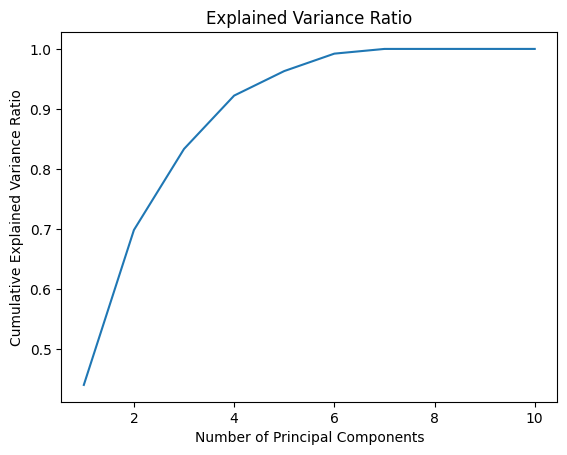

In [33]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset from the URL
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data'
column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv(data_url, names=column_names)

# Separate features and labels
X = df.drop('class', axis=1)
y = df['class']

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.show()